In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
%matplotlib inline

In [3]:
from google.colab import files
upload = files.upload()

Saving insurance_data.csv to insurance_data.csv


In [5]:
df = pd.read_csv(io.BytesIO(upload['insurance_data.csv']))

In [6]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


### **Plotting The Data**

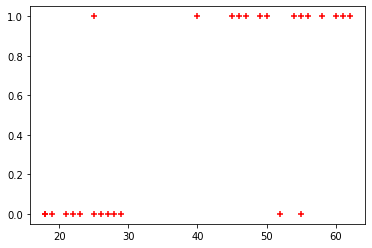

In [7]:
plt.scatter(df.age, df.bought_insurance, marker="+", color="red")

In [8]:
X = df[['age']]
y = df.bought_insurance

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

In [10]:
X_test

,age
8,62
13,29
9,61


In [11]:
X_train.head()

,age
21,26
0,22
11,28
16,25
17,58


In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### **Training the model**

In [13]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
model.predict(X_test)

array([1, 0, 1])

In [15]:
y_test

8     1
13    0
9     1
Name: bought_insurance, dtype: int64

In [16]:
model.score(X_test, y_test)

1.0

In [17]:
X_test

,age
8,62
13,29
9,61


In [18]:
model.predict_proba(X_test)

array([[0.04794221, 0.95205779],
       [0.77002443, 0.22997557],
       [0.0540927 , 0.9459073 ]])

### **Now let us consider only 70% of the data for training**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 1)
(9, 1)
(18,)
(9,)


In [22]:
X_test

,age
8,62
13,29
9,61
21,26
0,22
11,28
16,25
17,58
12,27


In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
lr.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 1, 0])

In [26]:
y_test

8     1
13    0
9     1
21    0
0     0
11    0
16    1
17    1
12    0
Name: bought_insurance, dtype: int64

In [27]:
model.score(X_test, y_test)

0.8888888888888888

## **With 90% training data we were getting 100% accuracy while training with only 70% data gives only 88.9% accuracy.**
